<P> <B> <font color=red size="4"> Decision Tree Regression </Font></B> </P>

In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target (convert classification target into continuous values)

In the context of the wine dataset, converting the target (originally a categorical variable) to a continuous variable is necessary because Decision Tree Regression is designed for regression tasks, where the target variable is continuous and numeric.

<b>Why Convert the Target?</b>

    Regression vs. Classification:
        Classification: The target variable represents discrete categories or labels (e.g., class 0, 1, 2 in the wine dataset). For this, we would use a Decision Tree Classifier.
        Regression: The target variable represents continuous values (e.g., numerical data like price, weight, or temperature). For this, we use Decision Tree Regressor.

    Since the wine dataset's target variable (wine.target) is categorical (0, 1, 2), and the task here is regression, the target needs to be transformed into a continuous format.

    Simulating a Regression Problem:
        Converting the discrete target to a continuous one is a way to simulate a regression task using the wine dataset.
        By adding a small continuous noise or scaling the categories, we can generate a numeric continuous target.

    Model Compatibility:
        A Decision Tree Regressor requires the target (y) to be numeric and continuous because it minimizes errors based on continuous metrics, such as Mean Squared Error (MSE).
        If you use categorical data directly with a regressor, it won't work as intended because the model doesn't handle categorical outputs.

In [3]:
# Convert target to continuous (for regression purposes)
# Here, we'll predict the average of the class indices plus some noise
y_continuous = y + 0.1 * (wine.data[:, 0])  # Example of continuous modification

In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_continuous, test_size=0.2, random_state=42)

In [5]:
# Initialize and fit Decision Tree Regressor
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [6]:
# Make predictions
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)


In [7]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

In [8]:
print(f"Training Mean Squared Error: {mse_train:.4f}")
print(f"Testing Mean Squared Error: {mse_test:.4f}")
print(f"Training R^2 Score: {r2_train:.4f}")
print(f"Testing R^2 Score: {r2_test:.4f}")


Training Mean Squared Error: 0.0002
Testing Mean Squared Error: 0.1726
Training R^2 Score: 0.9996
Testing R^2 Score: 0.6817


In [9]:
# Visualize feature importance
feature_importance = regressor.feature_importances_
features = wine.feature_names

C:\Users\root\AppData\Local\Temp\ipykernel_10952\3226429482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


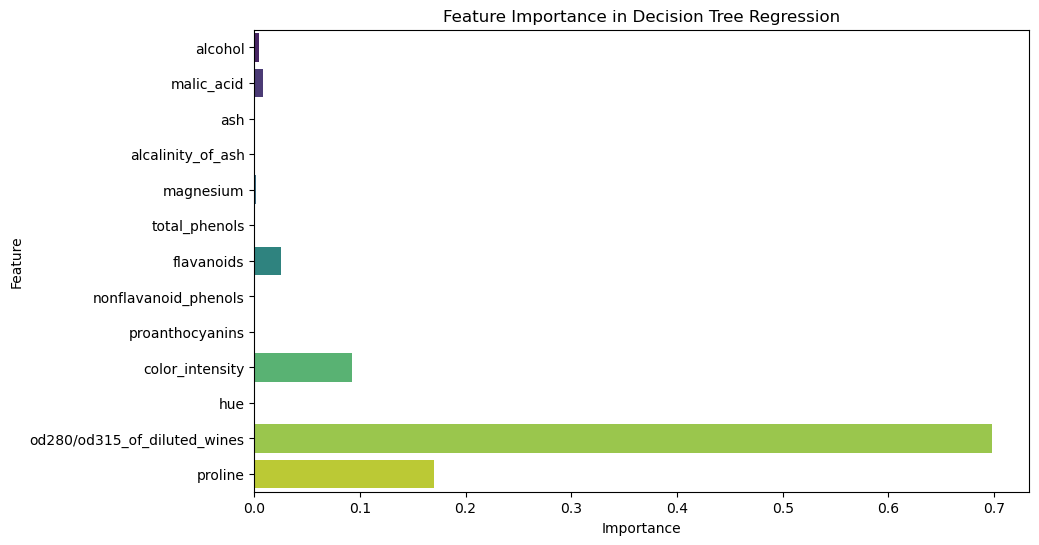

In [10]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.title("Feature Importance in Decision Tree Regression")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()